### Indian startups' funding

I'm working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information.

The are three datasets, including data from 2019, 2020 and 2021:

- `startup_funding2019.xlsx`
- `startup_funding2020.xlsx`
- `startup_funding2021.xlsx`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.xlsx) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. **fnd dataframe has 2343 rows and 10 columns**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_name = "startup_funding"

fnd = pd.DataFrame()

for i in range(2019,2022):
  df_tmp = pd.read_excel(file_name+str(i)+".xlsx")
  df_tmp['Year']=i
  fnd = pd.concat([fnd,df_tmp])


In [5]:
fnd.shape

(2343, 10)

In [6]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 201.4+ KB


Columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. 

In [7]:
fnd.head(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,2019
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A,2019
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A,2019
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G,2019


In [8]:
pd.to_numeric(fnd['Founded'])

ValueError: Unable to parse string "-" at position 568

In [10]:
fnd.replace(to_replace="-", value="", inplace=True)

In [11]:
fnd['Founded'] = pd.to_numeric(fnd['Founded'])

In [12]:
fnd['Amount($)'] = fnd['Amount($)'].str.replace(",","")

In [15]:
fnd['Amount($)']= pd.to_numeric(fnd['Amount($)'])

ValueError: Unable to parse string "Undisclosed" at position 5

In [16]:
fnd['Amount($)'] = fnd['Amount($)'].str.replace("Undisclosed","")

In [17]:
fnd['Amount($)']= pd.to_numeric(fnd['Amount($)'])

In [18]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2101 non-null   float64
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      1841 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 201.4+ KB


In [19]:
fnd['Stage'] = fnd['Stage'].fillna('')

In [20]:
fnd[pd.isna(fnd['Amount($)'])]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,,2019
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN,,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",NaN,Pre series A,2019
...,...,...,...,...,...,...,...,...,...,...
1141,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,NaN,Seed,2021
1153,Atomberg Technologies,2012.0,Mumbai,Consumer Electronics,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,NaN,,2021
1154,Genext Students,2013.0,Mumbai,EdTech,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,NaN,,2021
1159,OckyPocky,2015.0,Gurugram,EdTech,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",NaN,Seed,2021


In [21]:
fnd['Amount($)'] = fnd['Amount($)'].fillna(0)

I decided to leave the NaN in the 'Founded' year because replacing it with a value such as 0 distorts the descriptive statistics on min etc.

In [22]:
fnd.describe()

,Founded,Amount($),Year
count,2101.000000,2.343000e+03,2343.000000
mean,2016.085198,1.158957e+08,2020.475032
std,4.368597,3.420097e+09,0.570514
min,1963.000000,0.000000e+00,2019.000000
25%,2015.000000,2.000000e+05,2020.000000
50%,2017.000000,1.900000e+06,2021.000000
75%,2019.000000,9.950000e+06,2021.000000
max,2021.000000,1.500000e+11,2021.000000


In [23]:
print(fnd['Amount($)'].sum())

271543633855.83002


**Total amount of funding of dataframe is 271543633855.83 $**

The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021).

 How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? 

In [24]:
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [25]:
fnd_2020 = fnd[fnd['Year']==2020]

In [26]:
fnd_2020.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(5)

,Investor,size
789,Venture Catalysts,20
484,Mumbai Angels Network,12
85,Angel investors,12
334,Inflection Point Ventures,11
769,Undisclosed,10


**Venture Catalysts** was the Investor that funded the highest number of Company/Brand in 2020

Now I'll work with a datasets containing information of over **20k Software Professionals** with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.xlsx` At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city?

In [28]:
sps = pd.read_excel("Software Professionals Salary.xlsx")

In [29]:
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [30]:
sps_loc = sps.groupby(['Location'], as_index=False).agg(avg_rating=('Rating','mean'),avg_salary=('Salary','mean'))

In [31]:
sps_loc

,Location,avg_rating,avg_salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632
9,Pune,3.886082,690476.311153


In [32]:
fnd_2021 = fnd[fnd['Year']==2021]
fnd_loc = fnd_2021.groupby(['HeadQuarter'], as_index=False).agg(Brands_funded=('Company/Brand','count'),Total_invested=('Amount($)','sum'))
fnd_loc


,HeadQuarter,Brands_funded,Total_invested
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10
...,...,...,...
64,The Nilgiris,1,2.000000e+05
65,Thiruvananthapuram,1,0.000000e+00
66,Trivandrum,1,3.000000e+05
67,Vadodara,1,1.000000e+07


In [33]:
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')
sps_fnd_loc

,Location,avg_rating,avg_salary,HeadQuarter,Brands_funded,Total_invested
0,Bangalore,3.920232,735344.739593,Bangalore,425,1.432742e+10
1,Chennai,3.902726,584559.661513,Chennai,40,7.171400e+08
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,2.439600e+08
3,Jaipur,3.940741,629135.802469,Jaipur,11,3.433000e+08
4,Kolkata,4.024719,710925.573034,Kolkata,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,Mumbai,200,1.538293e+11
6,New Delhi,3.943415,658756.735632,New Delhi,143,1.673010e+09
7,Pune,3.886082,690476.311153,Pune,46,5.090700e+08


In [34]:
sps_fnd_loc = sps_fnd_loc.drop('HeadQuarter', axis=1)

In [35]:
sps_fnd_loc

,Location,avg_rating,avg_salary,Brands_funded,Total_invested
0,Bangalore,3.920232,735344.739593,425,1.432742e+10
1,Chennai,3.902726,584559.661513,40,7.171400e+08
2,Hyderabad,3.914484,679099.157376,34,2.439600e+08
3,Jaipur,3.940741,629135.802469,11,3.433000e+08
4,Kolkata,4.024719,710925.573034,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,200,1.538293e+11
6,New Delhi,3.943415,658756.735632,143,1.673010e+09
7,Pune,3.886082,690476.311153,46,5.090700e+08


In [36]:
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Total_invested'] / 1000000

In [37]:
sps_fnd_loc = sps_fnd_loc.drop('Total_invested', axis=1)

In [38]:
sps_fnd_loc.columns

Index(['Location', 'avg_rating', 'avg_salary', 'Brands_funded', 'Amount($MM)'], dtype='object')

In [39]:
sps_fnd_loc.columns = ['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']

In [40]:
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153829.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


**Kolkata** has the highest avg rating with 5 companies funded

<Axes: xlabel='Avg. Salary', ylabel='Sum Funding ($MM)'>

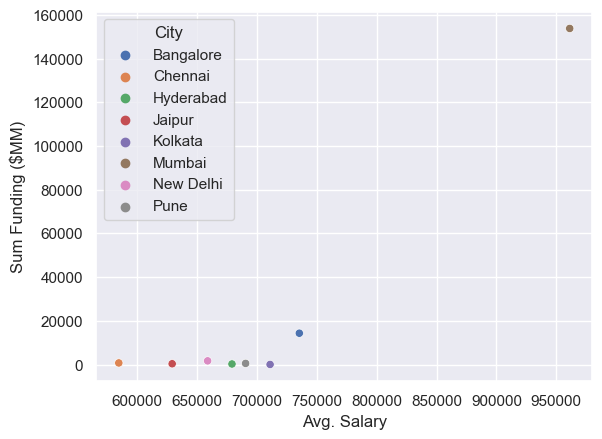

In [41]:
sns.set_theme()

sns.scatterplot(data=sps_fnd_loc, x="Avg. Salary", y="Sum Funding ($MM)", hue='City')

**Mumbai** stands out in terms of total funding received by companies and salary paid to their employees.

Now, I'll scrape [this census page](https://www.census2011.co.in/city.php) and I'll create a DataFrame called `cities` containing the first table from that page. 

6.
  1. Aizawl
  2. New Delhi is missing
  3. Chennai has the highest level of literacy but at the same time the lowest level of salary. It seems to be the only city that does not follow the trend.  Hyderaba has a much lower level of literacy than most of the cities in the graph but despite this has a higher average salary than NewDelhi which is both larger (in terms of population) and more literate.


In [42]:
import requests
from bs4 import BeautifulSoup

In [43]:
url = "https://www.census2011.co.in/city.php"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

In [44]:
results = soup.find('div', class_='table-responsive')

In [45]:
contents = soup.find_all('tr')

In [46]:
type(contents)

bs4.element.ResultSet

In [47]:
len(contents)


499

In [48]:
contents[0]

<tr>
<th>#</th>
<th class="alignleft">City</th>
<th>State</th>
<th>Population</th>
<th>Metropolitan</th>
<th>Sexratio</th>
<th>Literacy</th>
</tr>

In [49]:
header = contents[0].find_all('th')

In [50]:
#Create cities dict to initialize dataframe
cities_dict = dict()

header_list = []
for i in header:
  #initialize dictionary with key found
  cities_dict[i.text] = list()
  header_list.append(i.text)



In [51]:
#Compose the dict by appending each <td> found in<tr> to the list of the corresponding key
for tr in contents:
      td_tags = tr.find_all('td')
      if td_tags:
        index = 0
        while index <= 6:
          cities_dict[header_list[index]].append(td_tags[index].text)
          index += 1

#Create cities DataFrame
cities = pd.DataFrame(cities_dict)
cities.head(10)


,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,"12,442,373","18,414,288",853,89.73
1,2,Delhi,Delhi,"11,034,555","16,314,838",876,87.59
2,3,Bangalore,Karnataka,"8,443,675","8,499,399",923,88.71
3,4,Hyderabad,Andhra Pradesh,"6,731,790","7,749,334",955,83.26
4,5,Ahmedabad,Gujarat,"5,577,940","6,352,254",898,88.29
5,6,Chennai,Tamil Nadu,"4,646,732","8,696,010",989,90.18
6,7,Kolkata,West Bengal,"4,496,694","14,112,536",908,86.31
7,8,Surat,Gujarat,"4,467,797","4,585,367",756,87.89
8,9,Pune,Maharashtra,"3,124,458","5,049,968",948,89.56
9,10,Jaipur,Rajasthan,"3,046,163","3,046,163",900,83.33


In [52]:
cities.shape

(498, 7)

In [53]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #             498 non-null    object
 1   City          498 non-null    object
 2   State         498 non-null    object
 3   Population    498 non-null    object
 4   Metropolitan  498 non-null    object
 5   Sexratio      498 non-null    object
 6   Literacy      498 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB


In [54]:
cities['Population']=cities['Population'].str.replace(",","")

In [55]:
cities['Metropolitan']=cities['Metropolitan'].str.replace(",","")

In [56]:
cities.head(10)

,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,2,Delhi,Delhi,11034555,16314838,876,87.59
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
5,6,Chennai,Tamil Nadu,4646732,8696010,989,90.18
6,7,Kolkata,West Bengal,4496694,14112536,908,86.31
7,8,Surat,Gujarat,4467797,4585367,756,87.89
8,9,Pune,Maharashtra,3124458,5049968,948,89.56
9,10,Jaipur,Rajasthan,3046163,3046163,900,83.33


In [57]:
cities['Population'] = pd.to_numeric(cities['Population'])

In [58]:
cities['Metropolitan'] = pd.to_numeric(cities['Metropolitan'])

In [59]:
cities['Literacy'] = pd.to_numeric(cities['Literacy'])

In [60]:
cities['Sexratio'] = pd.to_numeric(cities['Sexratio'])

In [61]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #             498 non-null    object 
 1   City          498 non-null    object 
 2   State         498 non-null    object 
 3   Population    498 non-null    int64  
 4   Metropolitan  498 non-null    int64  
 5   Sexratio      498 non-null    int64  
 6   Literacy      498 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.4+ KB


In [62]:
cities.sort_values('Literacy', ascending = False)

,#,City,State,Population,Metropolitan,Sexratio,Literacy
150,151,Aizawl,Mizoram,293416,293416,1025,98.36
73,74,Kochi,Kerala,602046,2117990,1027,97.36
137,138,Thrissur,Kerala,315957,1854783,1075,97.06
102,103,Kozhikode,Kerala,431560,2030519,1093,96.53
267,268,Alappuzha,Kerala,174176,241072,1077,96.20
...,...,...,...,...,...,...,...
439,440,Khurja,Uttar Pradesh,111062,142636,902,65.61
230,231,Amroha,Uttar Pradesh,198471,198471,925,62.36
430,431,Bagaha,Bihar,112634,112634,889,59.84
133,134,Rampur,Uttar Pradesh,325313,349062,917,59.47


**Aizawl** has the highest level of literacy

Now I'll merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`.

In [63]:
sps_fnd_loc_lit = sps_fnd_loc.merge(cities, how = "left", on='City')

In [64]:
sps_fnd_loc_lit

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,14327.42,3,Karnataka,8443675.0,8499399.0,923.0,88.71
1,Chennai,3.902726,584559.661513,40,717.14,6,Tamil Nadu,4646732.0,8696010.0,989.0,90.18
2,Hyderabad,3.914484,679099.157376,34,243.96,4,Andhra Pradesh,6731790.0,7749334.0,955.0,83.26
3,Jaipur,3.940741,629135.802469,11,343.30,10,Rajasthan,3046163.0,3046163.0,900.0,83.33
4,Kolkata,4.024719,710925.573034,5,28.00,7,West Bengal,4496694.0,14112536.0,908.0,86.31
5,Mumbai,3.881709,961180.368491,200,153829.30,1,Maharashtra,12442373.0,18414288.0,853.0,89.73
6,New Delhi,3.943415,658756.735632,143,1673.01,NaN,NaN,NaN,NaN,NaN,NaN
7,Pune,3.886082,690476.311153,46,509.07,9,Maharashtra,3124458.0,5049968.0,948.0,89.56


In [65]:
sps_fnd_loc_lit = sps_fnd_loc_lit.drop('#', axis=1)
sps_fnd_loc_lit = sps_fnd_loc_lit.drop('State', axis=1)


The resulting DataFrame is missing one row compared to the `sps_fnd_loc`  dataset. 

In [66]:
cities[cities['State']=="Delhi"]

,#,City,State,Population,Metropolitan,Sexratio,Literacy
1,2,Delhi,Delhi,11034555,16314838,876,87.59
158,159,Kirari Suleman Nagar,Delhi,283211,283211,859,79.94
174,175,NDMC,Delhi,257803,257803,838,89.83
196,197,Karawal Nagar,Delhi,224281,224281,870,84.01
219,220,Nangloi Jat,Delhi,205596,205596,868,82.69
233,234,Bhalswa Jahangir Pur,Delhi,197148,197148,853,77.66
254,255,Sultan Pur Majra,Delhi,181554,181554,897,79.33
263,264,Hastsal,Delhi,176877,176877,865,83.71
275,276,Deoli,Delhi,169122,169122,860,84.28
300,301,Dallo Pura,Delhi,154791,154791,905,83.15


In [67]:
#replaced the values of 'Delhi' in the cities df with 'New Delhi'.
cities_c = cities.copy()
mask = cities['City']=="Delhi"

cities_c.loc[mask,'City'] = "New Delhi"
cities_c

,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,2,New Delhi,Delhi,11034555,16314838,876,87.59
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...,...
493,494,Gangtok,Sikkim,100286,100286,912,89.33
494,495,Datia,Madhya Pradesh,100284,100284,900,80.56
495,496,Nagda,Madhya Pradesh,100039,100039,947,80.71
496,497,Banswara,Rajasthan,99969,101177,960,85.72


In [69]:
#Re-merge, inner now
sps_fnd_loc_lit = sps_fnd_loc.merge(cities_c, how = "inner", on='City')

In [70]:
sps_fnd_loc_lit

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,14327.42,3,Karnataka,8443675,8499399,923,88.71
1,Chennai,3.902726,584559.661513,40,717.14,6,Tamil Nadu,4646732,8696010,989,90.18
2,Hyderabad,3.914484,679099.157376,34,243.96,4,Andhra Pradesh,6731790,7749334,955,83.26
3,Jaipur,3.940741,629135.802469,11,343.30,10,Rajasthan,3046163,3046163,900,83.33
4,Kolkata,4.024719,710925.573034,5,28.00,7,West Bengal,4496694,14112536,908,86.31
5,Mumbai,3.881709,961180.368491,200,153829.30,1,Maharashtra,12442373,18414288,853,89.73
6,New Delhi,3.943415,658756.735632,143,1673.01,2,Delhi,11034555,16314838,876,87.59
7,Pune,3.886082,690476.311153,46,509.07,9,Maharashtra,3124458,5049968,948,89.56


Looking at the new `sps_fnd_loc_lit` DataFrame,I'll produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles.

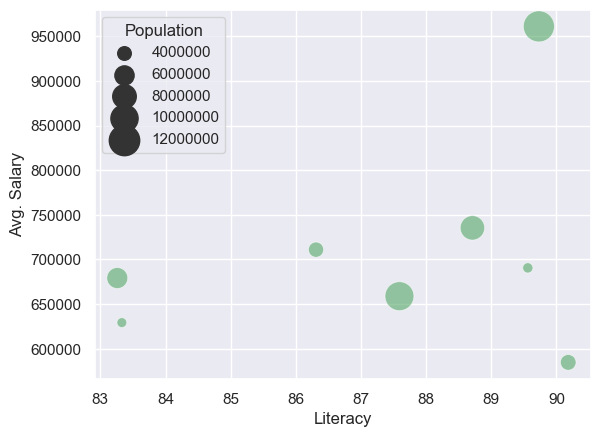

In [71]:
scatterplot = sns.scatterplot(data=sps_fnd_loc_lit, x='Literacy', y='Avg. Salary', size='Population', sizes=(50, 500),
                              alpha=0.6, color="g")




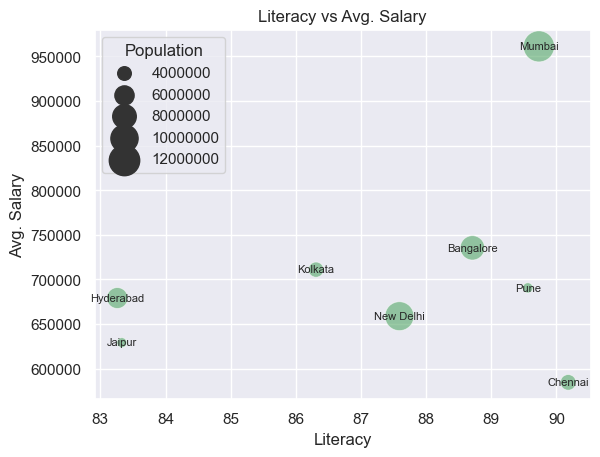

In [73]:
scatterplot = sns.scatterplot(data=sps_fnd_loc_lit, x='Literacy', y='Avg. Salary', size='Population', sizes=(50, 500),
                              alpha=0.6, color="g")

for index, row in sps_fnd_loc_lit.iterrows():
    scatterplot.text(row['Literacy'], row['Avg. Salary'], row['City'], fontsize=8, ha='center', va='center')


plt.title('Literacy vs Avg. Salary')
plt.xlabel('Literacy')
plt.ylabel('Avg. Salary')

plt.show()

**Chennai** has the highest level of literacy but at the same time the lowest level of salary. It seems to be the only city that does not follow the positive trend between `Literacy` and `Avg. Salary`.  **Hyderaba** has a much lower level of literacy than most of the cities in the graph but despite this has a higher average salary than **NewDelhi** which is both larger (in terms of population) and more literate.